## <font color ='Dark '> 1. Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
sns.set(color_codes=True)



## <font color ='Dark '> 2. Reading the data as a data frame and checking info

In [2]:
df_insurance=pd.read_csv('insurance.csv')

In [3]:
df_insurance.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## <font color ='Dark '> 3.Performing basic EDA

###  <font color ='Dark '>a)  Shape of the data

In [4]:
print('The shape of the data is ',df_insurance.shape)

The shape of the data is  (1338, 7)


### <font color ='Dark '> b) Data type of each attribute

In [5]:
for i in df_insurance.dtypes.keys():
    print(f'{i}:    {df_insurance.dtypes[i]}')

age:    int64
sex:    object
bmi:    float64
children:    int64
smoker:    object
region:    object
charges:    float64


### <font color ='Dark '>c) Checking the presence of missing values

In [6]:
df_insurance.isna().any(axis=0)

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

### <font color ='Dark '> d) 5 point summary of numerical attributes 

In [7]:
df_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### <font color ='Dark '>  e) Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

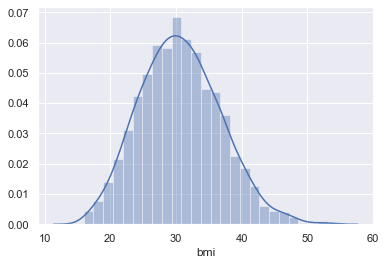

In [8]:
sns.distplot(df_insurance['bmi'])


#### BMI looks quiet normally distributed


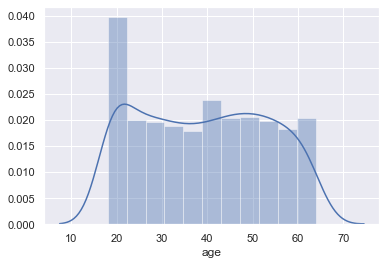

In [9]:
sns.distplot(df_insurance['age'])


#### Age seems be be distributed quiet uniformly


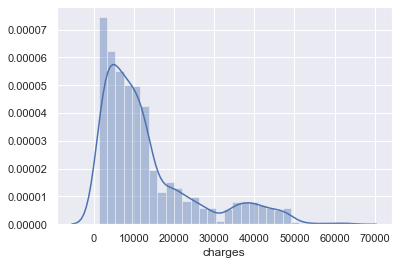

In [10]:
sns.distplot(df_insurance['charges'])

#### Charges are highly skewed

### <font color ='Dark '> f) Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [11]:
df_insurance.loc[:,['bmi', 'age' , 'charges']].skew()

bmi        0.284047
age        0.055673
charges    1.515880
dtype: float64

#### Skew of bmi is very less as seen in the distribution plot
#### Age is uniformly distributed and there's hardly any skew
#### Charges are highly skewed

### <font color ='Dark '> g) Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

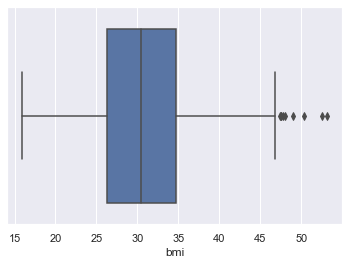

In [12]:
sns.boxplot(df_insurance['bmi'])

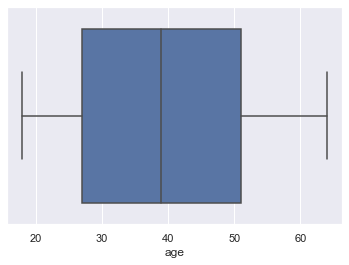

In [13]:
sns.boxplot(df_insurance['age'])

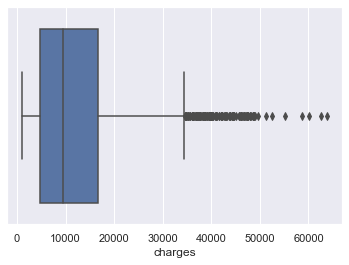

In [14]:
sns.boxplot(df_insurance['charges'])

#### BMI  has a few extreme values
#### Age has no outliers
#### Charges as it is highly skewed, there are quiet a lot of extreme values

### <font color ='Dark '>  h) Distribution of categorical columns

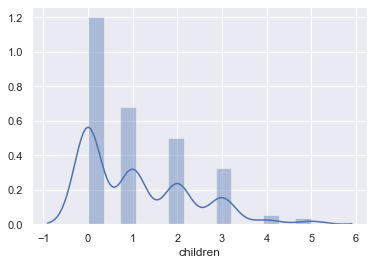

In [15]:
sns.distplot(df_insurance['children'])

#### children column has a right skewed distribution 

### <font color ='Dark '> i) Pair plot that includes all the columns of the data frame

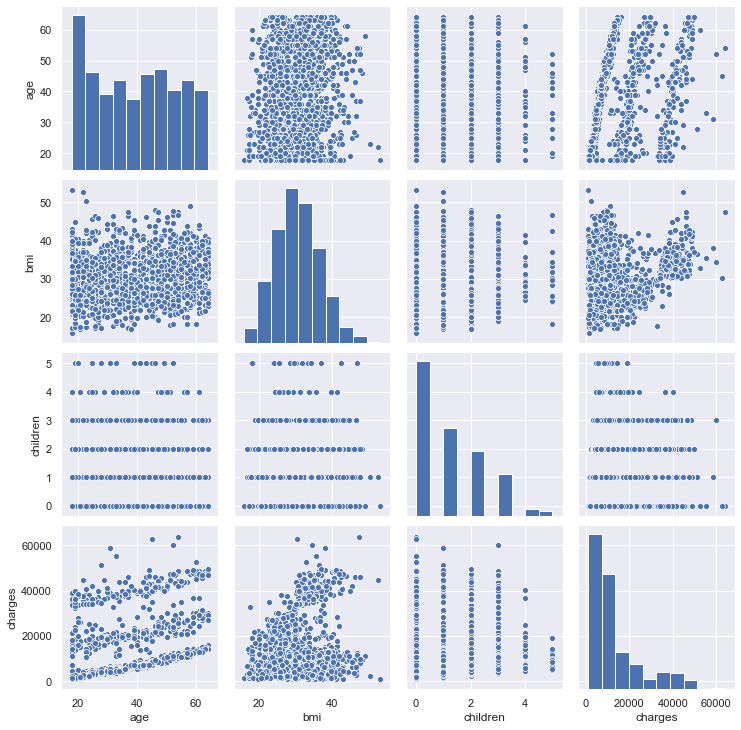

In [16]:
sns.pairplot(df_insurance)

## <font color ='Dark '> 4.

### <font color ='Dark '> Importing necessary libraries for hypothesis testing

In [17]:
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro,f_oneway
from statsmodels.stats.power import ttest_power

### <font color ='Dark '> a) Do charges of people who smoke differ significantly from the people who don't?

In [18]:

grp_smoker=df_insurance[df_insurance.apply(lambda x : x['smoker']=='yes',axis=1)]['charges']
grp_nonsmoker=df_insurance[df_insurance.apply(lambda x : x['smoker']=='no',axis=1)]['charges']


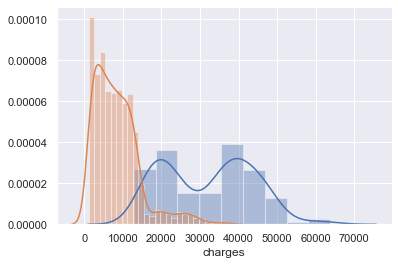

In [19]:
#checking distribution with boxplot
sns.distplot(grp_smoker)
sns.distplot(grp_nonsmoker)

In [20]:
# two-sample t-test
# Setting our significance level at 5%
# H0: Charges of smoker and non-smoker are same
# H1: Charges of smoker and non-smoker are not the same

In [21]:
# T-test to check dependency of smoking on charges
Ho = "Charges of smoker and non-smoker are same"   # Stating the Null Hypothesis
Ha = "Charges of smoker and non-smoker are not the same"   # Stating the Alternate Hypothesis

t,p_value=ttest_ind(grp_nonsmoker,grp_smoker)



if p_value < 0.05: 
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Charges of smoker and non-smoker are not the same as the p_value (8.271435842177219e-283) < 0.05


### <font color ='Dark '> b) Does bmi of males differ significantly from that of females

In [22]:
grp_male_bmi=df_insurance[df_insurance.apply(lambda x : x['sex']=='male',axis=1)]['bmi']
grp_female_bmi=df_insurance[df_insurance.apply(lambda x : x['sex']=='female',axis=1)]['bmi']


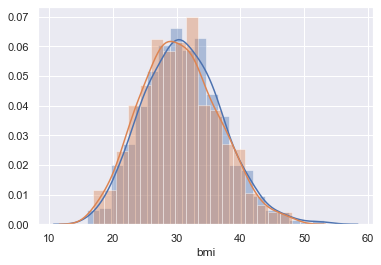

In [23]:
sns.distplot(grp_male_bmi)
sns.distplot(grp_female_bmi)

In [24]:

# checking equality of population variance between genders
# H0: Variances are equal
levene(grp_female_bmi,grp_male_bmi)

LeveneResult(statistic=0.0039394029791134, pvalue=0.949963293424026)

In [25]:

# T-test to check dependency of bmi on gender
Ho = "Gender has no effect on bmi"   # Stating the Null Hypothesis
Ha = "Gender has an effect on bmi"   # Stating the Alternate Hypothesis
t_statistic, p_value = ttest_ind(grp_female_bmi, grp_male_bmi)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Gender has no effect on bmi as the p_value (0.09) > 0.05


### <font color ='Dark '>c) Is the proportion of smokers significantly different in different genders?

In [26]:
# Chi_square test to check if smoking habits are different for different genders
Ho = "Gender has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Gender has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(df_insurance['sex'],df_insurance['smoker'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Gender has an effect on smoking habits as the p_value (0.007) < 0.05


smoker,no,yes
sex,,
female,547,115
male,517,159


### <font color ='Dark '> d) Is the distribution of bmi across women with no children, one child and two children, the same ?

In [28]:

Ho = "No. of children has no effect on bmi"   # Stating the Null Hypothesis
Ha = "No. of children has an effect on bmi"   # Stating the Alternate Hypothesis


df_female = df_insurance[df_insurance['sex'] == 'female']

zero = df_female[df_female.children == 0]['bmi']
one = df_female[df_female.children == 1]['bmi']
two = df_female[df_female.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')


No. of children has no effect on bmi as the p_value (0.716) > 0.05
